# Python Libraries #

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from prettytable import PrettyTable
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import time
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Loading the data

In [ ]:
data = pd.read_csv("/content/employee_promotion.csv")


# Exploratory data analysis

Length of data


In [ ]:
print(f'number of rows {data.shape[0]}')
print(f'number of cols {data.shape[1]}')

number of rows 54808
number of cols 13


Coloumns/features in data¶


In [ ]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')

Five top records of data

In [ ]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


Five last records of data

In [ ]:
data.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,NaN,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,49.0,0


Data information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


Data types of all coloumns

In [ ]:
data.dtypes

,0
employee_id,int64
department,object
region,object
education,object
gender,object
recruitment_channel,object
no_of_trainings,int64
age,int64
previous_year_rating,float64
length_of_service,int64


Counts of missing values in each column

In [ ]:
data.isnull().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


## **Univariate Analysis**

Numeric features distrubution

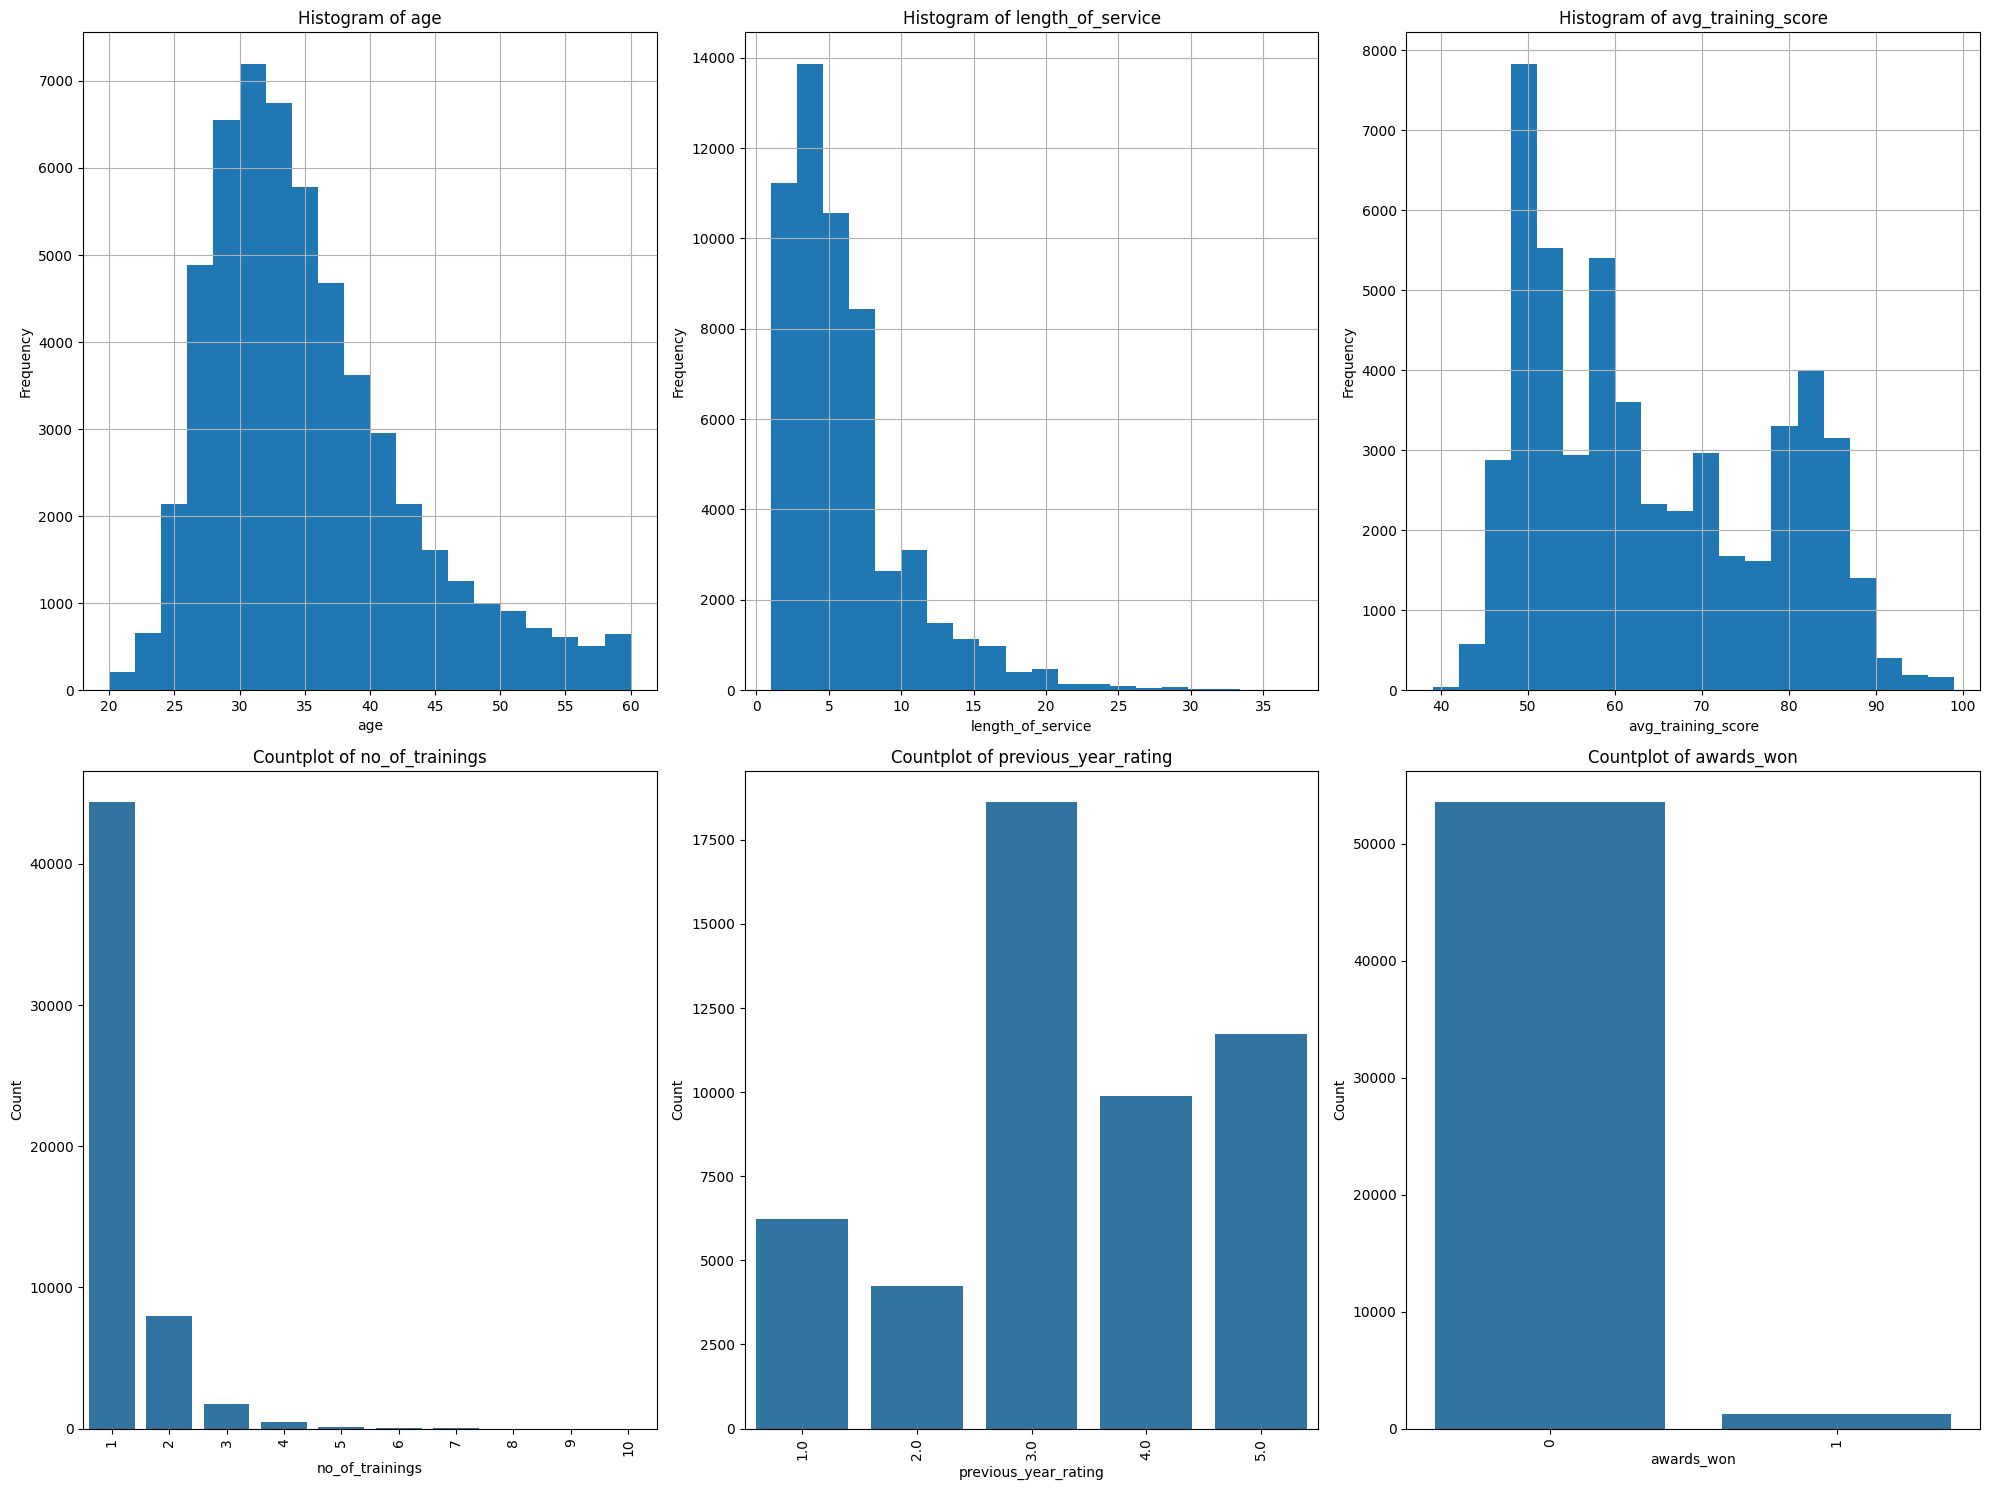

In [ ]:
hist_vars = ['age', 'length_of_service', 'avg_training_score']

# Automatically get all numerical columns
numerical_vars = data.select_dtypes(include=['int64', 'float64']).columns
countplot_vars = [var for var in numerical_vars if var not in hist_vars and var != 'employee_id' and var != 'is_promoted']

# Create a single figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=len(hist_vars), figsize=(20, 15))

# Plot histograms
for i, var in enumerate(hist_vars):
    data[var].hist(ax=axes[0, i], bins=20)
    axes[0, i].set_title(f"Histogram of {var}")
    axes[0, i].set_xlabel(var)
    axes[0, i].set_ylabel("Frequency")

# Plot countplots
for i, var in enumerate(countplot_vars):
    ax = plt.subplot(2, len(hist_vars), len(hist_vars) + i + 1)
    sns.countplot(data=data, x=var, ax=ax)
    ax.set_title(f"Countplot of {var}")
    ax.set_xlabel(var)
    ax.set_ylabel("Count")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate labels if needed

plt.tight_layout()
plt.show()

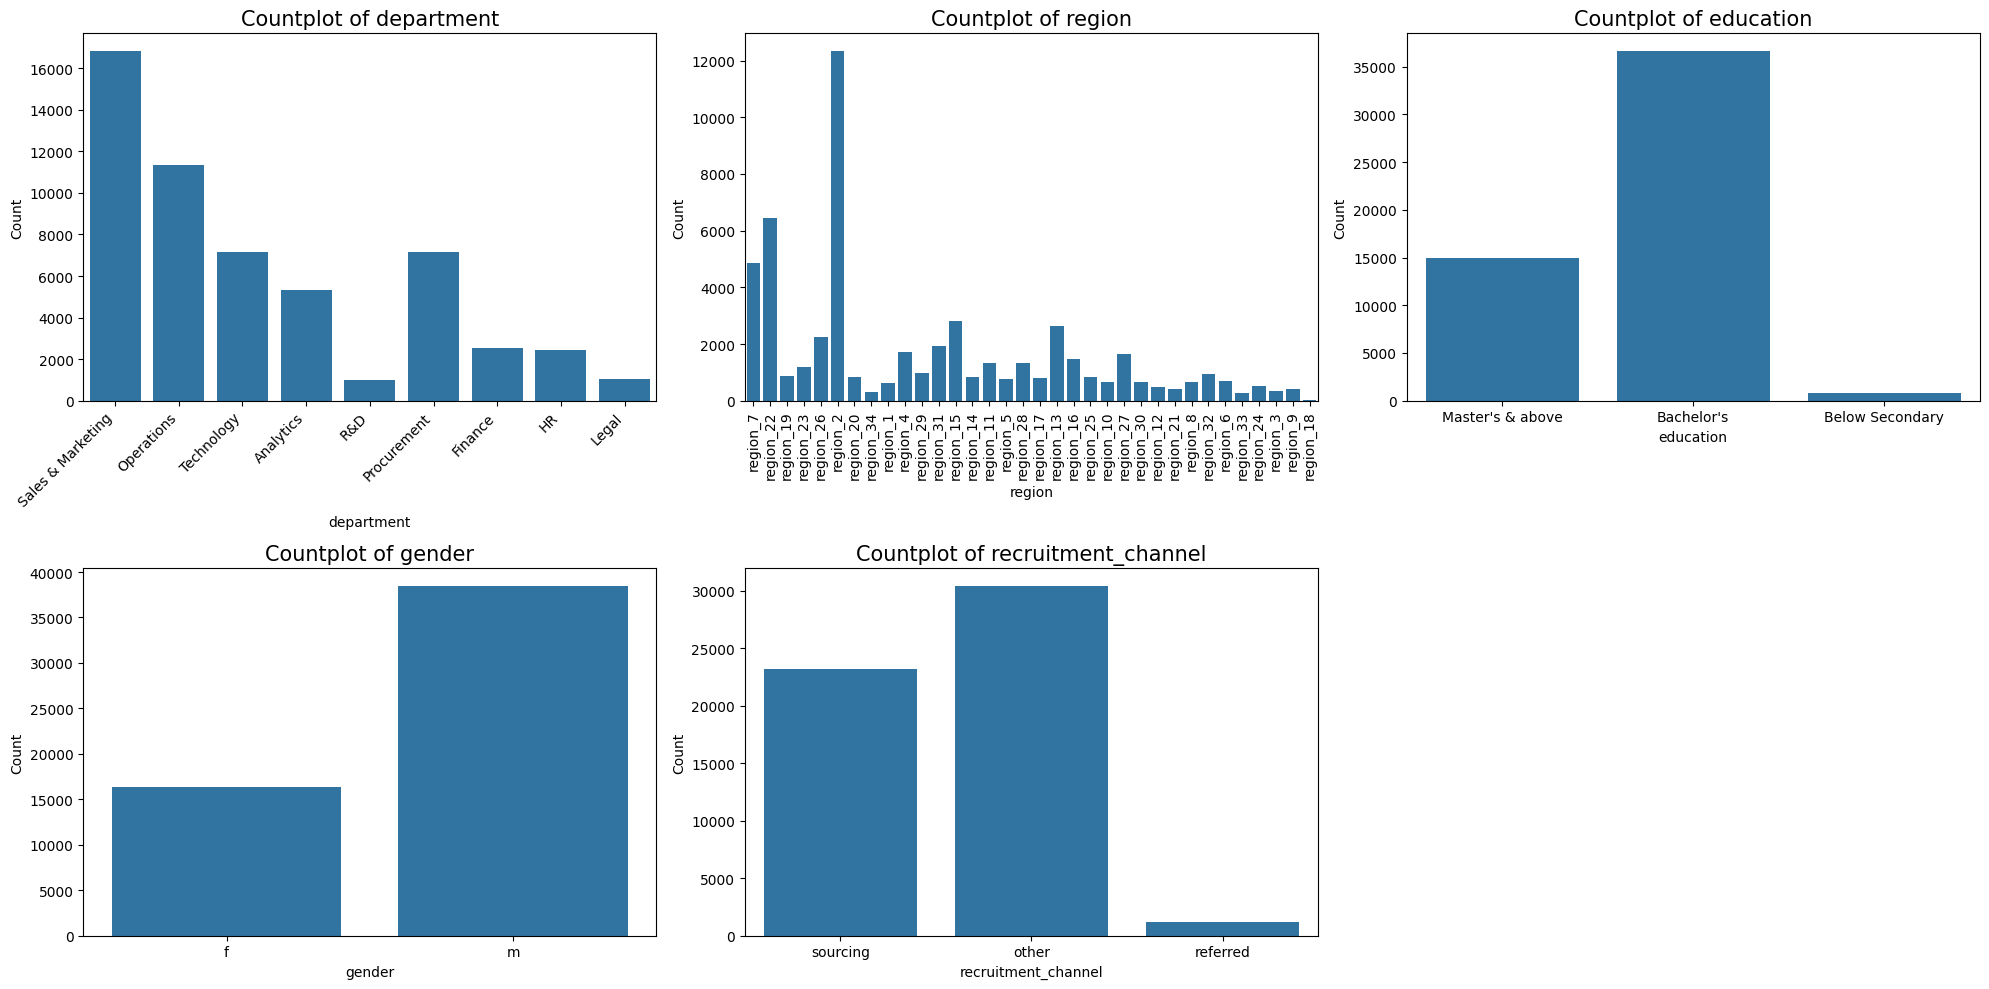

In [ ]:
categorical_vars = data.select_dtypes(include=['object', 'category']).columns

# Variables for special formatting
special_format_vars = {
    'region': {'rotation': 90, 'orientation': 'vertical'},
    'department': {'rotation': 45, 'orientation': 'oblique'}
}

# Determine the grid size
n_vars = len(categorical_vars)
n_cols = 3  # Number of plots per row
n_rows = (n_vars + n_cols - 1) // n_cols  # Calculate rows needed

# Create a figure with subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, n_rows * 5))

# Flatten axes array for easy indexing
axes = axes.flatten()

# Plot countplots for categorical variables
for i, var in enumerate(categorical_vars):
    ax = axes[i]
    sns.countplot(data=data, x=var, ax=ax)

    if var in special_format_vars:
        format_opts = special_format_vars[var]
        if format_opts['orientation'] == 'vertical':
            ax.set_xticklabels(ax.get_xticklabels(), rotation=format_opts['rotation'])
        elif format_opts['orientation'] == 'oblique':
            ax.set_xticklabels(ax.get_xticklabels(), rotation=format_opts['rotation'], ha='right')

    ax.set_title(f"Countplot of {var}", size=15)
    ax.set_xlabel(var)
    ax.set_ylabel("Count")

# Hide any unused subplots
for j in range(len(categorical_vars), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
sns.countplot(data= data, x = "is_promoted")
plt.show()

##Bivarite Analysis

Encoding these categorical features into numeric type

In [ ]:
pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(data['department'])
data['department'] = encpro

pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(data['region'])
data['region'] = encpro

pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(data['education'].astype(str))
data['education'] = encpro

pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(data['gender'])
data['gender'] = encpro

pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(data['recruitment_channel'].astype(str))
data['recruitment_channel'] = encpro

pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(data['recruitment_channel'])
data['recruitment_channel'] = encpro

Age plot with is_promoted

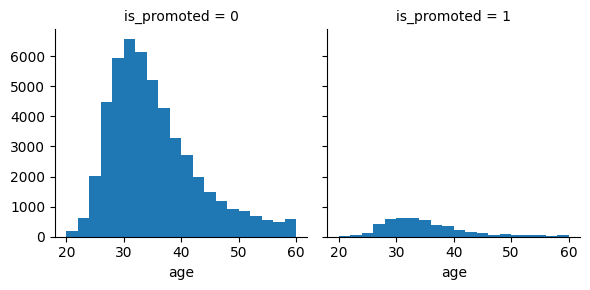

In [ ]:
g = sns.FacetGrid(data, col='is_promoted')
g.map(plt.hist, 'age', bins=20)

gender plot with is_promoted

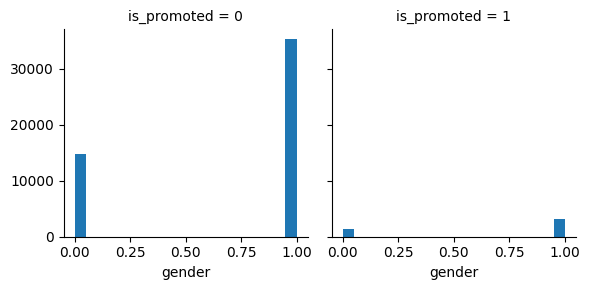

In [ ]:
g = sns.FacetGrid(data, col='is_promoted')
g.map(plt.hist, 'gender', bins=20)

recruitment_channel plot with is_promoted

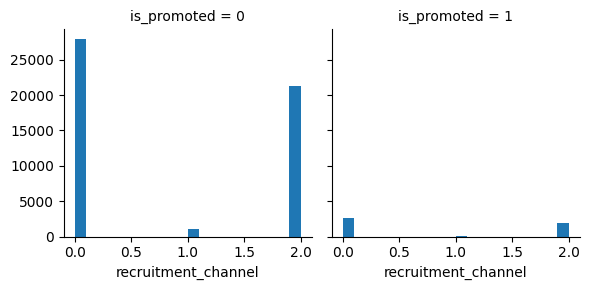

In [ ]:
g = sns.FacetGrid(data, col='is_promoted')
g.map(plt.hist, 'recruitment_channel', bins=20)

no_of_trainings plot with is_promoted

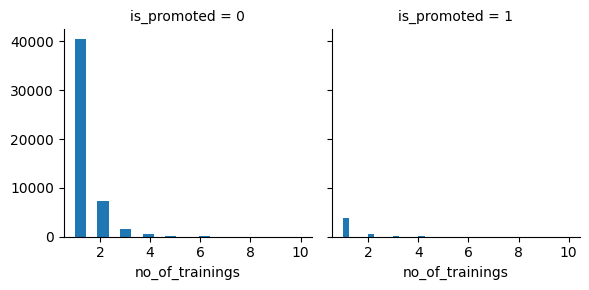

In [ ]:
g = sns.FacetGrid(data, col='is_promoted')
g.map(plt.hist, 'no_of_trainings', bins=20)

previous_year_rating plot with is_promoted

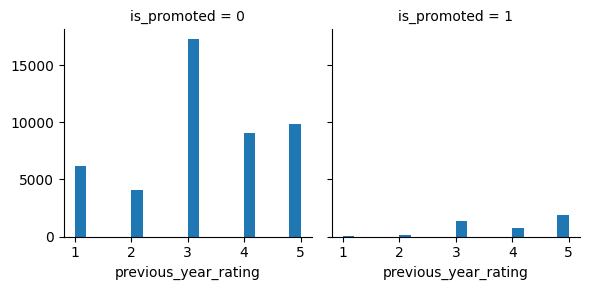

In [ ]:
g = sns.FacetGrid(data, col='is_promoted')
g.map(plt.hist, 'previous_year_rating', bins=20)

length_of_service plot with is_promoted

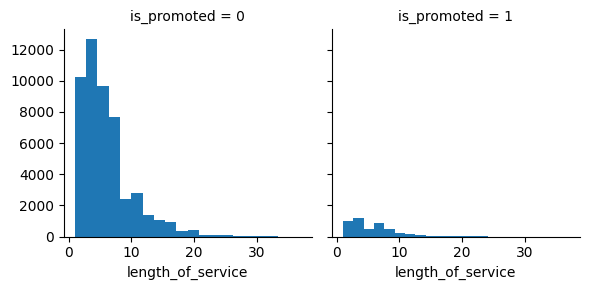

In [ ]:
g = sns.FacetGrid(data, col='is_promoted')
g.map(plt.hist, 'length_of_service', bins=20)

awards_won plot with is_promoted

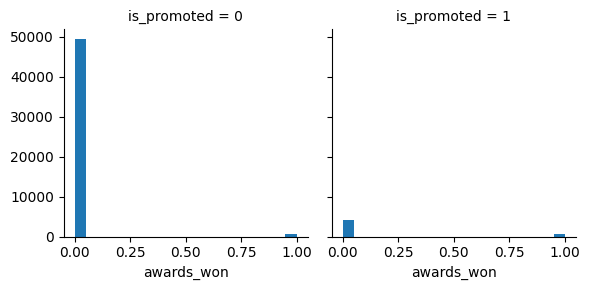

In [ ]:
g = sns.FacetGrid(data, col='is_promoted')
g.map(plt.hist, 'awards_won', bins=20)

avg_training_score plot with is_promoted

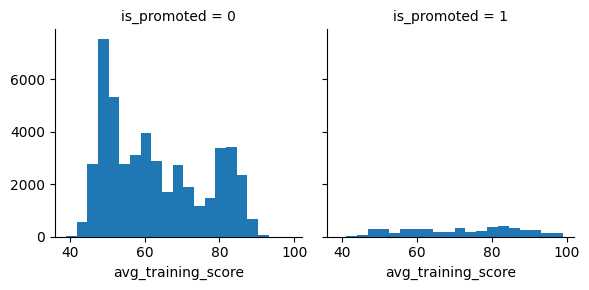

In [ ]:
g = sns.FacetGrid(data, col='is_promoted')
g.map(plt.hist, 'avg_training_score', bins=20)

##Coorelation

<Axes: title={'center': 'Pearson Correlation of Features'}>

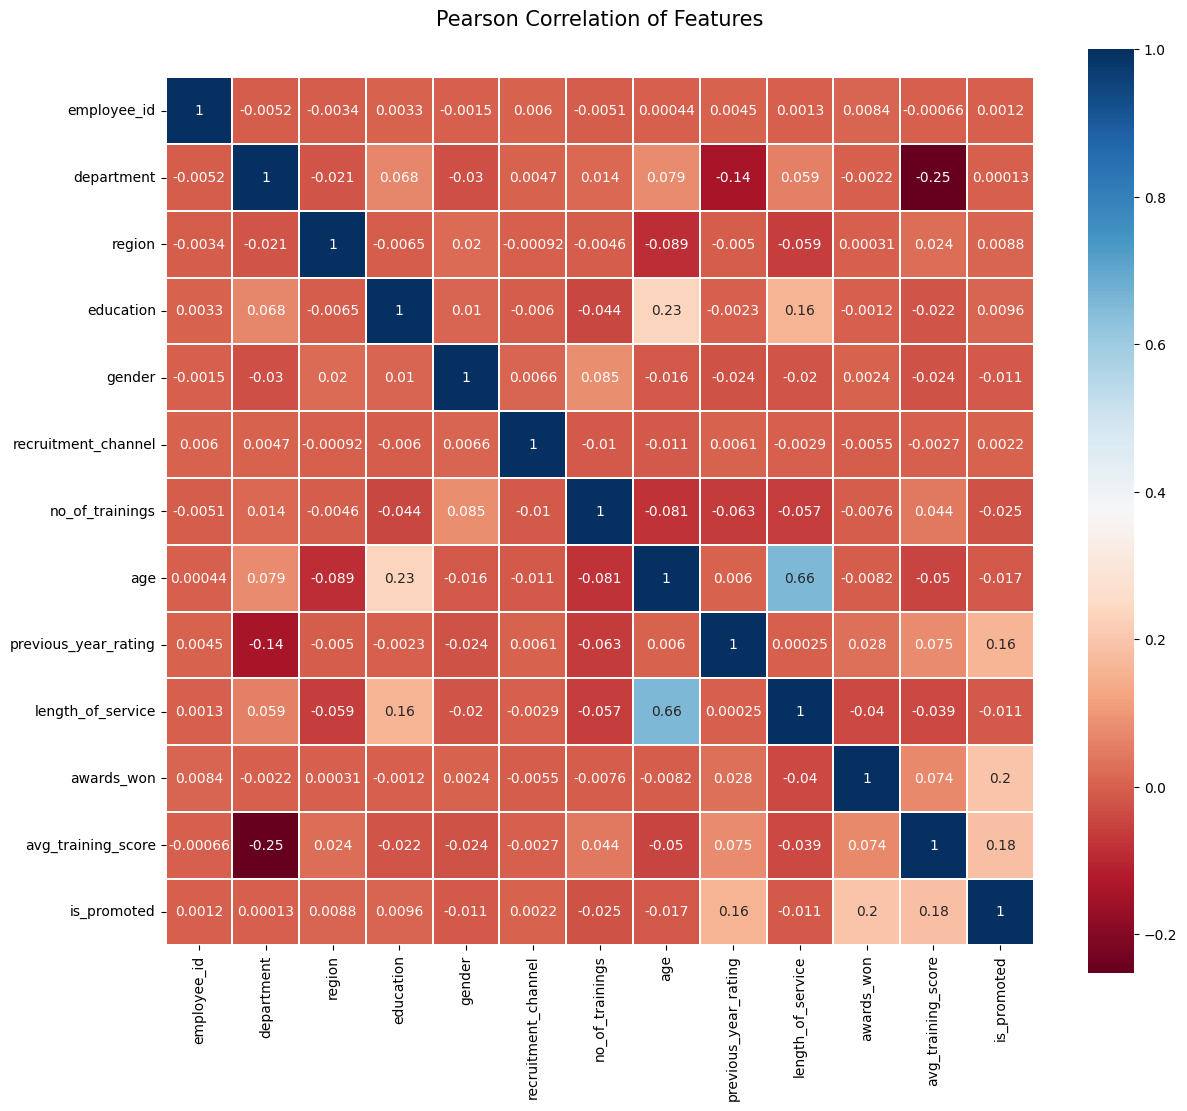

In [ ]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=True)